In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('preproc.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1337 non-null   int64  
 1   age         1337 non-null   int64  
 2   sex         1337 non-null   object 
 3   bmi         1337 non-null   float64
 4   children    1337 non-null   int64  
 5   smoker      1337 non-null   object 
 6   region      1337 non-null   object 
 7   charges     1337 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.7+ KB


In [7]:
df = pd.get_dummies(df)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1337 non-null   int64  
 1   age               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   charges           1337 non-null   float64
 5   sex_female        1337 non-null   bool   
 6   sex_male          1337 non-null   bool   
 7   smoker_no         1337 non-null   bool   
 8   smoker_yes        1337 non-null   bool   
 9   region_northeast  1337 non-null   bool   
 10  region_northwest  1337 non-null   bool   
 11  region_southeast  1337 non-null   bool   
 12  region_southwest  1337 non-null   bool   
dtypes: bool(8), float64(2), int64(3)
memory usage: 62.8 KB


In [11]:
df

,Unnamed: 0,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1333,1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1334,1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1335,1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [13]:
df = df.drop('Unnamed: 0', axis =1)

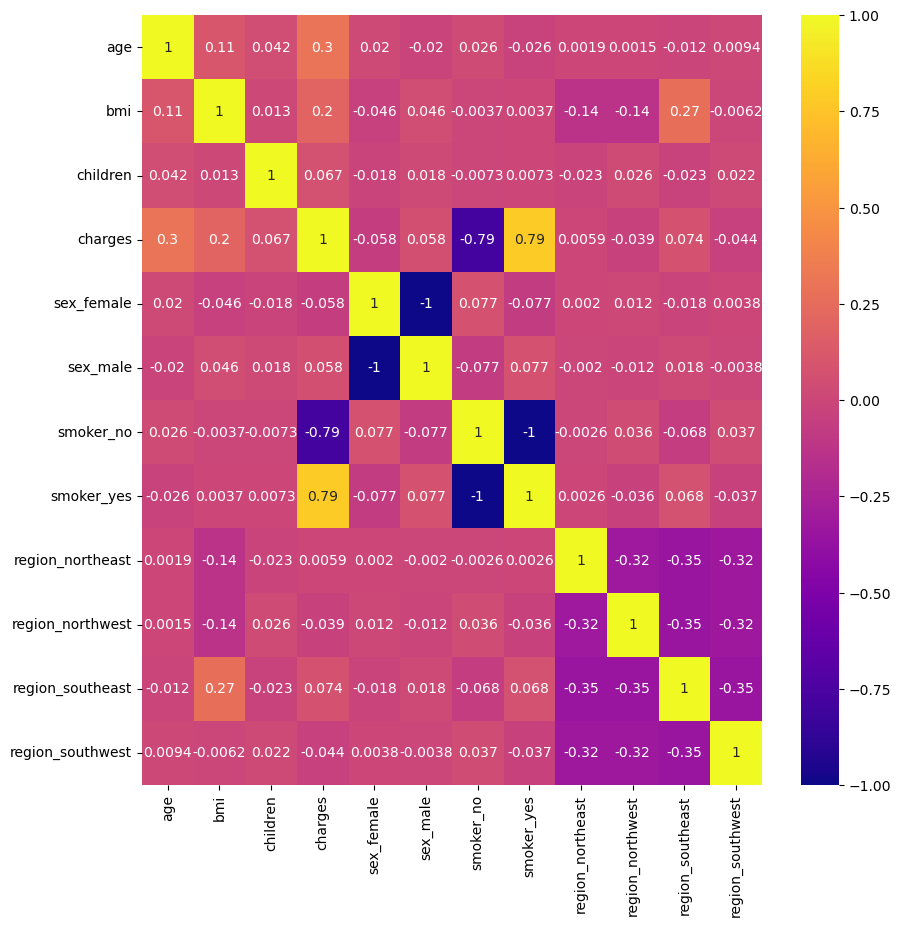

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'plasma', annot = True)

plt.show()

# MODEL TRAINING

In [17]:
#splitting data
x = df[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
y = df[['charges']]

In [19]:
#some more splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
#importing all the models from library
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
#implementing all the models on the dataset
lr = LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Gradient Boosting Regressor', gbr)]

In [25]:
#metric to dtermine the model performance
from sklearn.metrics import r2_score

('Linear Regression', 0.7530500094016388)
('K Nearest Neighbours', 0.7707713899814425)
('Decision Tree', 0.830552712192923)


D:\Downloads\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


('Random Forest', 0.8384717583587613)


D:\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('AdaBoost', 0.8366386489014684)


D:\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


('Gradient Boosting Regressor', 0.8478231775057895)


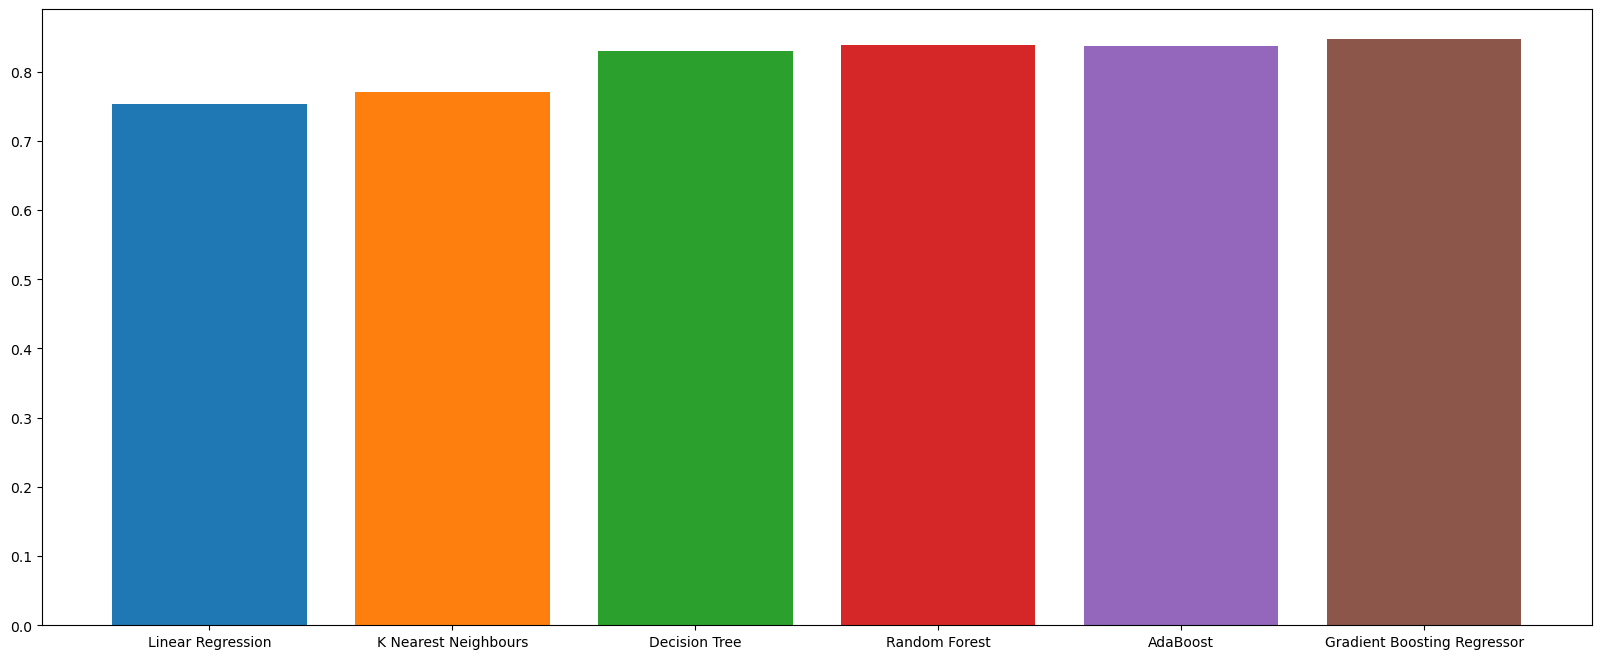

In [27]:
for regressor_name, regressor in regressors:
 
    # Fit regressor to the training set
    regressor.fit(x_train, y_train)    
   
    # Predict 
    y_pred = regressor.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    
    print((regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

Highest accuracy is given by Gradient boosting regressor. Hence we will choose this model for our predictions

# GRADIENT BOOSTER REGRESSOR

In [43]:
y_pred = gbr.predict(x_test)

In [52]:
y_pred

,charges
0,2400.122010
1,10702.442082
2,11140.624465
3,34219.057830
4,10458.005602
...,...
263,5402.804930
264,7431.526412
265,3598.634956
266,26701.806013


In [53]:
y_pred.rename(columns = {'charges':'predicted_charges'}, inplace = True)

In [29]:
y_test.rename(columns = {'charges':'actual_charges'}, inplace = True)

In [59]:
y_test.reset_index(inplace=True)


In [60]:
y_test

,index,actual_charges
0,1247,1633.96180
1,609,8547.69130
2,393,9290.13950
3,503,32548.34050
4,198,9644.25250
...,...,...
263,808,3309.79260
264,725,6664.68595
265,937,2304.00220
266,474,25382.29700


In [61]:
y_test = y_test.drop('index', axis =1)

In [62]:
y_test

,actual_charges
0,1633.96180
1,8547.69130
2,9290.13950
3,32548.34050
4,9644.25250
...,...
263,3309.79260
264,6664.68595
265,2304.00220
266,25382.29700


In [63]:
y_pred

,predicted_charges
0,2400.122010
1,10702.442082
2,11140.624465
3,34219.057830
4,10458.005602
...,...
263,5402.804930
264,7431.526412
265,3598.634956
266,26701.806013


In [64]:
results = pd.concat([y_test, y_pred], axis=1)


In [73]:
#combimned dataframe
results

,actual_charges,predicted_charges
0,1633.96180,2400.122010
1,8547.69130,10702.442082
2,9290.13950,11140.624465
3,32548.34050,34219.057830
4,9644.25250,10458.005602
...,...,...
263,3309.79260,5402.804930
264,6664.68595,7431.526412
265,2304.00220,3598.634956
266,25382.29700,26701.806013


<AxesSubplot:>

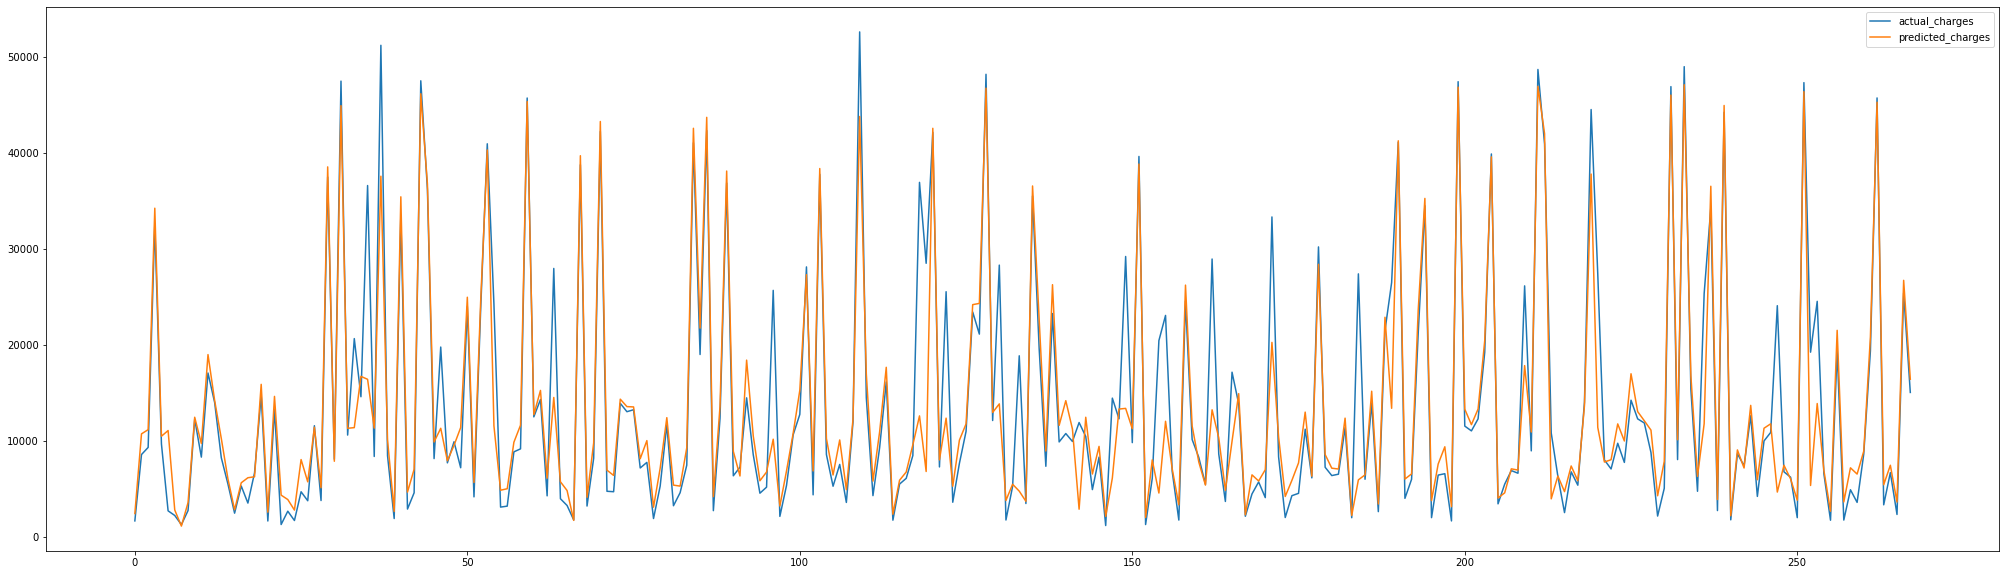

In [72]:
#comparing actual and predicted charges on the graph
results.plot(figsize=(35,10))

From the above graph it can be inferred that the difference between actual and predicted charges is not that much for mid range and smaller values of actual charges. However, for higher actual charges, there are some larger deviations in some cases.

By the inspection of this graph and r2 score, this regression model is giving us satisfactory results and shall be used for predictions.

In [71]:
#Exporting our final prediction file
results.to_csv('results.csv')
